In [3]:
import matplotlib.pyplot as plt
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.model_selection import ShuffleSplit, learning_curve, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, f1_score, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns 
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import collections
from imblearn.over_sampling import ADASYN 
from sklearn.feature_selection import RFE
from sklearn.decomposition import KernelPCA

data=pd.read_csv('Dataset/final_dataframe.csv',sep=",")
data

,PATIENT_ID,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,...,OS_STATUS,VITAL_STATUS,RADIO_THERAPY,BREAST_SURGERY,CANCER_TYPE_DETAILED,ER_STATUS,HER2_STATUS,PR_STATUS,SAMPLE_TYPE,TUMOR_SIZE
0,MB-0362,8.676978,6.075331,5.453928,4.994525,5.838270,6.397503,7.906217,5.259461,5.702379,...,0,0,1,1,1,1,0,1,0,15.0
1,MB-0346,9.653589,6.687887,5.454185,5.346010,5.600876,5.246319,8.267256,5.380069,5.521794,...,0,0,0,1,1,0,1,0,0,13.0
2,MB-0386,9.033589,5.910885,5.501577,5.247467,6.030718,10.111816,7.959291,5.262024,5.689533,...,1,2,1,0,1,1,0,1,0,12.0
3,MB-0574,8.814855,5.628740,5.471941,5.316523,5.849428,6.116868,9.206376,5.396576,5.439130,...,1,2,1,0,1,1,0,1,0,18.0
4,MB-0503,9.274265,5.908698,5.531743,5.244094,5.964661,7.828171,8.706646,5.167213,5.417484,...,1,2,1,0,1,1,0,1,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,MB-6189,9.522033,7.823506,5.511611,5.422752,5.689935,5.736615,8.255405,5.242311,5.639000,...,1,2,1,0,4,1,0,1,0,39.0
1120,MB-5465,8.131637,9.101942,5.423027,4.939292,5.644587,5.611189,7.798269,5.219962,5.597732,...,0,0,1,0,1,0,0,0,0,22.0
1121,MB-5453,9.606915,7.427494,5.534115,5.062191,5.927409,5.927031,8.520545,5.129501,5.550549,...,0,0,1,0,1,0,0,1,0,27.0
1122,MB-5471,9.049296,6.850000,5.339346,5.166765,6.117095,6.374305,8.499637,4.961279,5.497546,...,1,2,0,1,1,1,0,0,0,10.0


In [4]:
X = data.drop(['PATIENT_ID'],axis=1)

data =X.groupby('CANCER_TYPE_DETAILED').filter(lambda x: len(x) > 10)
data.groupby('CANCER_TYPE_DETAILED').count()

features = data.iloc[:,0:24360]
label = data['CANCER_TYPE_DETAILED']

test = SelectKBest(score_func=chi2, k=20)          # DEFINE THE NUMBER OF FEATURES IN K
fit = test.fit(features, label)
skbest_X = fit.transform(features)

scaler =StandardScaler()
Xs = scaler.fit_transform(skbest_X)

X_train,X_test,y_train,y_test = train_test_split(Xs,label,test_size=0.3,random_state=42,shuffle=True)

ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)

In [3]:
# X_res, y_res = SMOTE().fit_resample(features, label)
# print(sorted(collections.Counter(y_res).items()))

# # ada = ADASYN(random_state=42)
# # X_res, y_res = ada.fit_resample(features, label)
# # print('Resampled dataset shape %s' % collections.Counter(y_res))

In [1]:
pipelines = []
# pipelines.append(( 'ScaledXG' , Pipeline([( 'Scaler' , StandardScaler()),( 'XGBoost' ,
#     xgb.XGBClassifier())])))
pipelines.append(( 'ScaledLR' , Pipeline([( 'Scaler' , StandardScaler()),( 'LR' ,
    LogisticRegression())])))
pipelines.append(( 'ScaledKNN' , Pipeline([( 'Scaler' , StandardScaler()),( 'KNN' ,
    KNeighborsClassifier())])))
pipelines.append(( 'ScaledRF' , Pipeline([( 'Scaler' , StandardScaler()),( 'RF' ,
    RandomForestClassifier(n_estimators=110, criterion = 'entropy'))])))
pipelines.append(( 'ScaledNB' , Pipeline([( 'Scaler' , StandardScaler()),( 'NB' ,
    GaussianNB())])))
pipelines.append(( 'ScaledSVM' , Pipeline([( 'Scaler' , StandardScaler()),
                                           ( 'SVM' , SVC(kernel='rbf',random_state=42,gamma=0.1,C=1))])))

# Test options and evaluation metric
num_folds = 5
seed = 7 
scoring =  'accuracy'
results = []
names = []
alphas = np.logspace(-3, -1, 30)
for name, model in pipelines:
     kfold = KFold(num_folds, random_state=seed, shuffle=True)
     cv_results = cross_val_score(model, X_res, y_res, cv=kfold, n_jobs=-1, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(msg)
     plt.plot(model, cv_results, label=name)
print('-> 5-Fold cross-validation accurcay score for the training data for four classifiers')

# selector = RFE(estimator, 5, step=1)
# selector = selector.fit(X, y)
# selector.support_
# selector.ranking_

NameError: name 'Pipeline' is not defined

In [22]:
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca', KernelPCA(n_components=2, kernel='rbf')),
                     ('clf', SVC(probability=True, verbose=False))])

#Fit Pipeline to training Data
pipe_svc.fit(X_train, y_train)

#print('--> Fitted Pipeline to training Data')

scores = cross_val_score(estimator=pipe_svc, X=X_res, y=y_res, cv=5, n_jobs=1, verbose=0)
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = [0.01, 0.1]
param_grid = [{'clf__C': 10,
               'clf__kernel': ['rbf'],
               'clf__gamma': param_range},]
gs_svc = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=5,n_jobs=1)
gs_svc = gs_svc.fit(X_res, y_res)
print('--> Tuned Parameters Best Score: ',gs_svc.best_score_)
print('--> Best Parameters: \n',gs_svc.best_params_)

--> Model Training Accuracy: 0.718 +/- 0.026


ValueError: Parameter values for parameter (clf__C) need to be a sequence(but not a string) or np.ndarray.

In [13]:
clf_svc = gs_svc.best_estimator_

#Get Final Scores
clf_svc.fit(X_res, y_res)
scores = cross_val_score(estimator=clf_svc,
                         X=X_res,
                         y=y_res,
                         cv=10,
                         n_jobs=1)
print('--> Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

print('--> Final Accuracy on Test set: %.5f' % clf_svc.score(X_test,y_test))

--> Final Model Training Accuracy: 0.671 +/- 0.050
--> Final Accuracy on Test set: 0.77515


In [14]:
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=3)),
                     ('clf', KNeighborsClassifier())])
            
#Fit Pipeline to training Data
pipe_knn.fit(X_train, y_train) 

scores = cross_val_score(estimator=pipe_knn, 
                         X=X_res, 
                         y=y_res, 
                         cv=5,
                         n_jobs=1)
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = range(10, 31)
param_grid = [{'clf__n_neighbors': param_range}]
# instantiate the grid
gs_knn = GridSearchCV(estimator=pipe_knn, 
                    param_grid=param_grid, 
                    cv=5, 
                    scoring='accuracy')
gs_knn = gs_knn.fit(X_res, y_res)
print('--> Tuned Parameters Best Score: ',gs_knn.best_score_)
print('--> Best Parameters: \n',gs_knn.best_params_)

--> Model Training Accuracy: 0.713 +/- 0.019
--> Tuned Parameters Best Score:  0.705439330543933
--> Best Parameters: 
 {'clf__n_neighbors': 11}


In [15]:
pipe_rf = Pipeline([('scl', StandardScaler()),
                     ('pca', KernelPCA(n_components=2, kernel='rbf')),
                     ('clf', RandomForestClassifier())])
            
#Fit Pipeline to training Data
pipe_rf.fit(X_train, y_train) 

scores = cross_val_score(pipe_rf, X_res, y_res, cv=5, n_jobs=1, scoring='accuracy')
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_grid = [{'clf__bootstrap': [True],
               'clf__n_estimators': [110],
               'clf__max_features': [0.65],
               'clf__min_samples_leaf': [18],
               'clf__min_samples_split': [8],
               'clf__criterion': ['gini','entropy']
              },]

# instantiate the grid
gs_rf = GridSearchCV(estimator=pipe_rf, 
                    param_grid=param_grid, 
                    cv=5, 
                    scoring='accuracy')
gs_rf = gs_rf.fit(X_res, y_res)
print('--> Tuned Parameters Best Score: ',gs_rf.best_score_)
print('--> Best Parameters: \n',gs_rf.best_params_)

--> Model Training Accuracy: 0.742 +/- 0.032
--> Tuned Parameters Best Score:  0.7548117154811715
--> Best Parameters: 
 {'clf__bootstrap': True, 'clf__criterion': 'entropy', 'clf__max_features': 0.65, 'clf__min_samples_leaf': 18, 'clf__min_samples_split': 8, 'clf__n_estimators': 110}


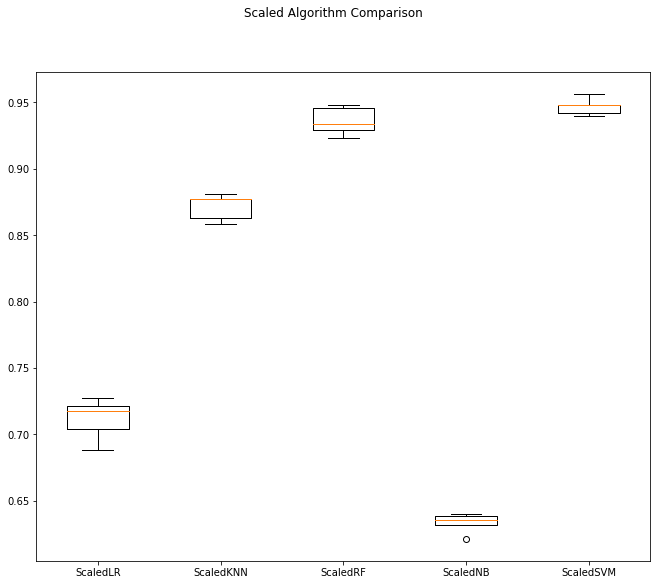

In [21]:
fig = plt.figure(figsize=(11,9))
fig.suptitle( 'Scaled Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [16]:
pipeline = []
pipeline.append(( 'ScaledXGB' , Pipeline([( 'Scaler' , StandardScaler()),( 'XGBoost' ,
    xgb.XGBClassifier())])))

# Test options and evaluation metric
num_folds = 5
seed = 7 
scoring =  'accuracy'
results = []
names = []
for name, model in pipeline:
     kfold = KFold(num_folds, random_state=seed, shuffle=True)
     cv_results = cross_val_score(model, X_res, y_res, cv=kfold, n_jobs=-1, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(msg)
print('-> 5-Fold cross-validation accurcay score for the training data for xgb classifier')

ScaledXGB: 0.876151 (0.013648)
-> 5-Fold cross-validation accurcay score for the training data for xgb classifier


In [19]:
pipe_xg = Pipeline([('scl', StandardScaler()),
                     ('clf', xgb.XGBClassifier())])
            
#Fit Pipeline to training Data
pipe_xg.fit(X_res, y_res) 

scores = cross_val_score(estimator=pipe_xg, X=X_res, y=y_res, cv=5, n_jobs=1)
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_grid = [{'clf__learning_rate': [0.15, 0.20],'clf__max_depth': [6, 8], 
               'clf__min_child_weight' : [1, 3],
               'clf__gamma': [0.5, 1, 1.5], 'clf__colsample_bytree': [0.4] },]

# instantiate the grid
pipe_xg = GridSearchCV(estimator=pipe_xg, param_grid=param_grid, cv=5, scoring='accuracy')
pipe_xg = pipe_xg.fit(X_res, y_res)
print('--> Tuned Parameters Best Score: ',pipe_xg.best_score_)
print('--> Best Parameters: \n',pipe_xg.best_params_)

--> Model Training Accuracy: 0.879 +/- 0.018
--> Tuned Parameters Best Score:  0.902928870292887
--> Best Parameters: 
 {'clf__colsample_bytree': 0.4, 'clf__gamma': 0.5, 'clf__learning_rate': 0.2, 'clf__max_depth': 8, 'clf__min_child_weight': 3}


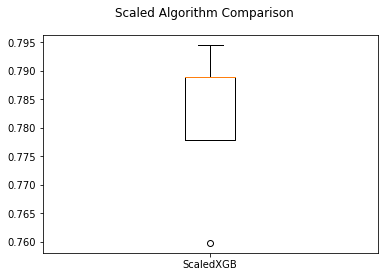

In [32]:
fig = plt.figure()
fig.suptitle( 'Scaled Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()